# Experimento 1: Transientes em Linhas de Transmissão

**Nome:** Lucas Guimarães Braga               **RA:** 182775 

**Nome:** Lucas Zenichi Terada                **RA:** 182543

**Nome:** Nicolas Franco Rufino Almeida Prado **RA:** 185142

In [2]:
#Helper imports and definitions

import numpy
from matplotlib import pyplot

%matplotlib inline

def float2(s):
    return float(s.replace(b',', b'.'))

def load_osciloscope_csv(filename):
    with open(filename, 'r') as fin:
        line = fin.readline()
        if 'Oscilloscope DSO-X 2002A' in line:
            for _ in range(20): fin.readline()
            ch = sum(1 if v.strip() != '' else 0 for v in fin.readline().split(';')[2:])
            cols = [1, 2, 3] if ch > 1 else [1, 2]
            conv = {c: float2 for c in cols}
            data = numpy.loadtxt(filename, delimiter=';', skiprows=22, usecols=cols, converters=conv)
        if line.startswith('Record Length'):
            cols = [3, 4, 10] if len(line.split(',')) > 7 else [3, 4]
            data = numpy.loadtxt(filename, delimiter=',', usecols=cols)
    return tuple(data[:, i] for i in range(data.shape[1]))

# Introdução

Linhas de transmissão são guias de onda que operam no modo fundamental TEM.
Neste modo, pode-se descrever o fenômeno de propagação eletromagnética diretamente através de ondas de tensão e corrente que se propagam em ambos os sentidos na linha.

As características circuitais das linhas de transmissão são derivadas de sua geometria e estão diretamente relacionadas com a velocidade de propagação $v_p$ dos sinais na linha e sua impedância característica $Z_0$.
Para o caso de uma linha sem perdas:

\begin{align}
& Z_0 = \sqrt{\frac{L'}{C'}} && v_p = \frac{1}{\sqrt{L'C'}}
\end{align}

em que $L'$ e $C'$ representam a indutância e a capacitância por unidade de comprimento da linha.
Esses parâmetros aparecem em seu modelo circuital, ilustrado a seguir.

![Modelo circuital](attachment:fig-1-1.svg "Modelo circuital para linhas de transmissão sem perdas.")

Um sinal de tensão $V_0^+$ que se propaga na linha a partir do gerador em direção a uma carga $Z_L$ sofrerá reflexão quando essa carga estiver descasada com a linha segundo:

\begin{equation}
\Gamma_L = \frac{V_0^-}{V_0^+} = \frac{Z_L - Z_0}{Z_L + Z_0}
\end{equation}

em que $\Gamma_L$ é o coeficiente de reflexão na carga.

Da mesma forma, o sinal refletido $V_0^- = \Gamma_LV_0^+$ poderá sofrer nova reflexão junto ao gerador se este não estiver com sua impedância interna casada segundo:

\begin{equation}
\Gamma_S = \frac{V_1^+}{V_0^-} = \frac{Z_S - Z_0}{Z_S + Z_0}
\end{equation}

em que $\Gamma_S$ é o coeficiente de reflexão na fonte.

Assim, um novo sinal $V_1^+ = \Gamma_S V_0^-$ irá propagar-se em direção à carga, reiniciando o ciclo.
Esse processo pode ser visualizado por meio de um diagrama de reflexões (ou zig-zag), conforme mostram as seguintes figuras para uma linha de impedância característica 50 Ω conectando uma carga de 250 Ω a uma fonte com impedância interna de 10 Ω.
A partir desse diagrama é possível traçar o transitório do sinal em qualquer ponto da linha, em especial em sua entrada e saída, somando-se todas as contribuições acumuladas ao longo do tempo.

![Diagrama de reflexões](attachment:fig-1-2.svg "Exemplo de diagrama de reflexões para uma linha descasada.")
![Tensão na linha](attachment:fig-1-3.svg "Exemplo tensões ao longo do tempo para uma linha descasada.")

# Características da Linha

Utilizando o medidor RLC meça a capacitância característica do cabo RG-58 utilizando os cabos de aproximadamente 1 m, 3 m e 100 m.
Indique o valor medido abaixo.

**RESPOSTA**

1m :  147.8pF

3m :  332.0pF         

100m:   9.9nF

De acordo com o manual de específicação do produto a capacitância nominal é de 101.5$\frac{pF}{m}$, logo os valores medidos condizem com a capacitância da especificação [1].

Qual é o impacto da frequência escolhida? Deve-se realizar a medida em alta ou baixa frequência?

**RESPOSTA:** Quanto menor a frequência, mais desprezíveis são as indutâncias do modelo da linha de transmissão. Portanto a medida deve ser realizada em baixas frequências para que o circuito equivalente seja aproximadamente apenas das capacitâncias em paralelo.

Como deve ser terminado o cabo para medição?

**RESPOSTA:** O cabo deve estar terminado em aberto, para que o circuito seja apenas o paralelo dos capacitores.

Como eliminar o efeito da conexão entre o cabo a ser medido e o medidor?

**RESPOSTA:** Deve-se medir a capacitância do medidor sozinho (53pF) e subtrair este valor do total, uma vez que as capacitância total é soma das duas por estarem em paralelo. 

Meça a velocidade de propagação no cabo mais longo.
Para essa medição sugere-se a montagem apresentada na figura a seguir com carga de 50 Ω e excitada por uma onda quadrada com mínimo em 0 V, máximo em 1 V e período de 3 μs (utilize um duty cycle de 50%).
A medição dos sinais deve ser feita através de um osciloscópio de dois canais que possibilite determinar o atraso entre os sinais de entrada e saída do cabo.

![Montagem](attachment:fig-1-4.svg "Montagem para medidas nos cabos coaxiais.")

**RESPOSTA:** A velocidade de propagação é determinada através do atraso ($t_p$) entre a onda de entrada e a onda de saída na linha de transmissão de comprimento $l$, dessa forma a velocidade de propagação ($v_p$) é determinada da seguinte forma:

$$v_p = \frac{l}{t_p}$$

Considere o seguinte código com os dados experimentais:

In [3]:
tp = 522e-9 #Defasagem das ondas
l = 100     #Tamanho da linha de transmissao
vp = l/tp   #Calculo da velocidade de propagacao
print(round(vp,2), "m/s\n")
print("Fator de velocidade: ", round(vp/(3e8)*100,2), "%")

191570881.23 m/s

Fator de velocidade:  63.86 %


A especificação do cabo diz que o fator de velocidade é igual a 65.9%, logo o valor encontrado é adequado [1].

Calcule a indutância característica $L'$ esperada para os cabos e sua impedância característica.
Compare seus resultados com os esperados para o cabo.

**RESPOSTA:** Dado que $v_p = \frac{1}{\sqrt{L'C'}}$ temos que:

In [4]:
C = 9.9e-9
C_linha = C/l
L_linha = 1/(vp**2*C_linha)
print("A indutância característica é de: {} H/m".format(L_linha))

A indutância característica é de: 2.752363636363637e-07 H/m


# Linha com Carga Descasada

Meça as formas de onda na entrada e saída do cabo mais longo de acordo com a montagem anterior quando a carga $R$ assume valores de circuito aberto, curto-circuito e 75 Ω.
A excitação deve ser uma onda quadrada com mínimo em 0 V e máximo em 1 V (utilize um duty cycle de 50%).
Escolha o período da onda quadrada a partir do tempo de trânsito da linha de modo que seja possível observar todas as reflexões relevantes.
Apresente o diagrama zig-zag para as formas de onda observadas e compare-as com o esperado de acordo com a teoria.

## Circuito Aberto

Diagrama Zig-Zag:

![Diagrama zig-zag para circuito aberto](img/zig_zag_aberto_teorico.png)

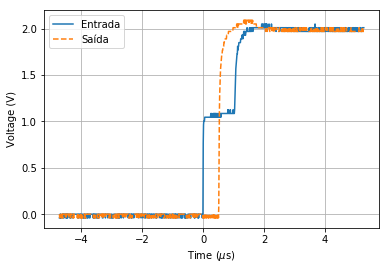

In [5]:
# Plot signals from osciloscope
# Do not forget to modify the legend and axes labels according to your setup
time, ch1, ch2 = load_osciloscope_csv('1_aberto.csv')
time = [x * 1e6 for x in time]
pyplot.plot(time, ch1, '-', label='Entrada')
pyplot.plot(time, ch2, '--', label='Saída')
pyplot.legend()
pyplot.xlabel('Time ($\mu$s)')
pyplot.ylabel('Voltage (V)')
pyplot.grid(True)

**RESPOSTA:** Analisando os dados do osciloscópio observa-se que na entrada a tensão vai de $0$ a $V_0$ e em seguida vai até $2V_0$, entre esses dois momento a saída vai de $0$ a $2V_0$. Esses dados, como é possível observar, está de acordo com o diagrama zig-zag para circuito aberto.

## Curto-Circuito

Diagrama Zig-Zag:

![Diagrama zig-zag para curto-circuito](img/zig_zag_curto_teorico.png)

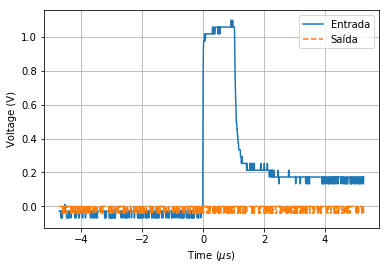

In [6]:
# Plot signals from osciloscope
# Do not forget to modify the legend and axes labels according to your setup
time, ch1, ch2 = load_osciloscope_csv('2_curto.csv')
time = [x * 1e6 for x in time]
pyplot.plot(time, ch1, '-', label='Entrada')
pyplot.plot(time, ch2, '--', label='Saída')
pyplot.legend()
pyplot.xlabel('Time ($\mu$s)')
pyplot.ylabel('Voltage (V)')
pyplot.grid(True)

**RESPOSTA:** Através dos dados do osciloscópio é possível observar que no saída a tensão é sempre igual a zero o que condiz com o gráfico zig-zag uma vez que toda a onda inscidente no curto é invertida e refletida. Na entrada é possível observar que a tensão vai de $0$ a $V_0$ em um primeiro instante e logo após cai a um valor próximo a zero. A tensão não vai a zero nesse instante em diante uma vez que há impedâncias resistivas, que não foi considerada no modelo, ao longo da linha de transmissão.

## 75 Ω

Diagrama Zig-Zag:

![Diagrama zig-zag para 75 Ω](img/zig_zag_75_teorico.png)

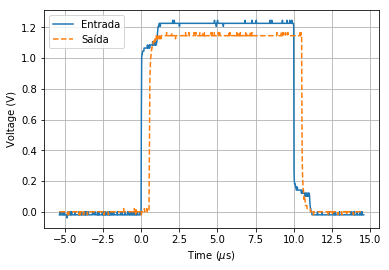

In [7]:
# Plot signals from osciloscope
# Do not forget to modify the legend and axes labels according to your setup
time, ch1, ch2 = load_osciloscope_csv('3_75ohms.csv')
time = [x * 1e6 for x in time]
pyplot.plot(time, ch1, '-', label='Entrada')
pyplot.plot(time, ch2, '--', label='Saída')
pyplot.legend()
pyplot.xlabel('Time ($\mu$s)')
pyplot.ylabel('Voltage (V)')
pyplot.grid(True)

**RESPOSTA:** Os sinais medidos estão de acordo com o diagrama de zig-zag teórico, já que na entrada o sinal vai de $0$ para $V_0^+$, para $6/5 V_0^+$, e na saída vai de $0$ diretamente para $6/5 V_0^+$, bem similar ao observado no sinal, com pequenas diferenças devido às perdas desprezadas no modelo.

# Linha Descasada na Fonte e na Carga

Utilizando a montagem conforme a seguinte figura, meça novamente as formas de onda na entrada e saída do cabo mais longo utilizando uma excitação de onda quadrada apropriada.
Apresente o diagrama zig-zag para a forma de onda observada.
Explique a forma de onda observadas, comparando-a com a teoria.

![Montagem](attachment:fig-1-5.svg "Montagem para medida com entrada e saída descasadas.")


Diagrama Zig-Zag:

![Diagrama Zig-Zag](img/zig_zag_descasado_teorico.png)

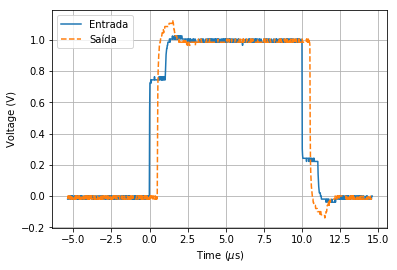

In [8]:
# Plot signals from osciloscope
# Do not forget to modify the legend and axes labels according to your setup
time, ch1, ch2 = load_osciloscope_csv('4_descasado.csv')
time = [x * 1e6 for x in time]
pyplot.plot(time, ch1, '-', label='Entrada')
pyplot.plot(time, ch2, '--', label='Saída')
pyplot.legend()
pyplot.xlabel('Time ($\mu$s)')
pyplot.ylabel('Voltage (V)')
pyplot.grid(True)

**RESPOSTA:** O sinal medido divergiu do esperado pelo diagrama zig-zag. Principalmente, o sinal de saída, que deveria ir de $0$ para $2 V_0$, teve um valor inicial de aproximadamente $1,6 V_0$. A provável causa dessa divergência teve como natureza um erro na montagem.

Com a fonte e a carga casadas com a linha, alimente dois trechos de cabos de 100 m unidos por um conector e observe a forma de onda no início do cabo.
Simule uma conexão imperfeita entre os dois cabos, desconectando parcialmente o conector.
Apresente a forma de onda coletada.
Qual a aplicação do cenário em questão?

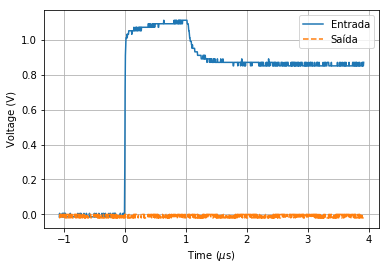

In [9]:
# Plot signals from osciloscope
# Do not forget to modify the legend and axes labels according to your setup
time, ch1, ch2 = load_osciloscope_csv('5_defeito.csv')
time = [x * 1e6 for x in time]
pyplot.plot(time, ch1, '-', label='Entrada')
pyplot.plot(time, ch2, '--', label='Saída')
pyplot.legend()
pyplot.xlabel('Time ($\mu$s)')
pyplot.ylabel('Voltage (V)')
pyplot.grid(True)

**RESPOSTA:** Utilizando a onda obtida, através dos fenômenos de reflexão, é possível determinar imperfeições na linha de transmissão e a partir do instante de tempo em que houve reflexão no receptor é possível determinar o quanto a imperfeição está distante da fonte.

## Referências

[1] Manual de especificações do cabo RG-58 - https://www.pasternack.com/images/ProductPDF/RG58C-U.pdf. Acessado em 18 de março de 2019.

# Orientação para submissão do relatório final

Após finalizar o experimento e o relatório:

1. Gere um arquivo PDF do roteiro completo: clique em *File/Print Preview* e gere o PDF;
1. **Revise** seu relatório;
1. Envie o relatório final pelo site do curso (apenas um aluno envia pelo grupo);
1. Crie um backup do seu relatório (arquivos ipynb e PDF) e guarde com você;
1. Apague os seus arquivos de trabalho do computador.
 
Assegure-se de que:
- O início do relatório indentifica os alunos e os respectivos RAs;
- Todas as figuras foram carregadas apropriadamente e estão legíveis;
- O texto das respostas nas células não está incompleto ou cortado;
- As grandezas apresentadas no texto e nos cálculos possuem unidades;
- Seus resultados sejam referenciados e discutidos no texto.